# Fuerzas de ligadura | Partícula sobre semi-esfera

[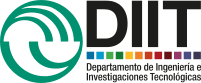](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Enunciado

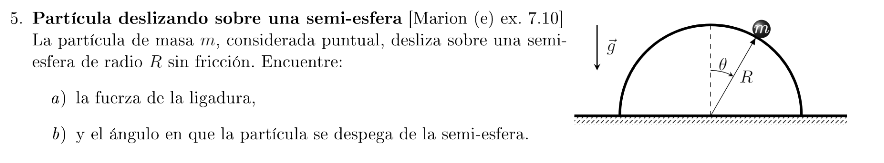

## Variables

In [26]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Defino los parámetros físicos del sistema
m, g, R = sym.symbols('m, g, R', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
rho = sym.Function(r'\rho')(t) # radio coordenadas polares
theta = sym.Function(r'\theta')(t) # ángulo coordenadas polares

## Posición

In [28]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posición
m_r = rho* (sym.sin(theta) * N.x + sym.cos(theta) * N.y)

## Ligaduras

In [29]:
f1 = rho - R
lambda1 = sym.symbols('lambda_1') # Tantos lambda como funciones de ligadura

x = sym.Function('x')(t)
y = sym.Function('y')(t)
f1_simbolo = sym.Function('f_1')(x,y)
f1_eq = sym.Eq(f1_simbolo, f1)
f1_eq

## Energía cinética

In [30]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m_v = m_r.diff(t,N) # derivada respecto a t en el marco referencial N
m_T = unMedio* m* m_v.dot(m_v)
T = sym.Eq(sym.Symbol('T'), m_T.simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

## Energía potencial

In [31]:
# Energía potencial
m_V = - (m* g* (- N.y)).dot(m_r)
V = sym.Eq(sym.Symbol('V'), m_V )
V

## Lagrangiano

In [32]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs))
L

## Ecuaciones de Euler-Lagrange

In [38]:
theta_dq = L.rhs.diff(theta)
rho_dq = L.rhs.diff(rho)

In [39]:
theta_dtdp = L.rhs.diff(theta.diff(t)).diff(t)
rho_dtdp = L.rhs.diff(rho.diff(t)).diff(t)

In [40]:
theta_Q = lambda1* f1.diff(theta)
rho_Q = lambda1* f1.diff(rho)
rho_Q

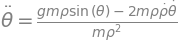

In [41]:
theta_EL = sym.Eq(theta_dq - theta_dtdp - theta_Q, 0) # ecuación igualando a cero
theta_EL
theta_pp = sym.Eq(theta.diff(t,2),
       list( sym.solveset( theta_EL, theta.diff(t,2) ) )[0]  # solveset devuelve un set, que convertimos a lista
      )
theta_pp

In [52]:
rho_EL = sym.Eq(rho_dq - rho_dtdp + R_Q, 0) # ecuación igualando a cero
rho_EL.simplify()
rho_pp = sym.Eq(rho.diff(t,2),
       list( sym.solveset( rho_EL, rho.diff(t,2) ) )[0]  # solveset devuelve un set, que convertimos a lista
      )
rho_pp

## Aplicación de la función de ligadura

Debe aplicarse ahora la función de restricción de la ligadura.
No solo hay que substituir en las ecuaciones de Euler-Lagrange el que

In [43]:
rho_f1 = sym.solve(f1, rho)[0]
sym.Eq(rho, rho_f1)

También se puede establere que la derivada primera y segunda con el tiempo de la función de restricción de la ligadura:

In [44]:
sym.Eq(f1.diff(t), 0)

In [45]:
f1_pp = sym.Eq(f1.diff(t,2), 0)
f1_pp

In [46]:
f1_subs = {
    rho : rho_f1,
    rho.diff(t): rho_f1.diff(t),
    rho.diff(t): rho_f1.diff(t,2)
}

In [47]:
theta_EL_subs = theta_EL.subs(f1_subs).simplify()
theta_EL_subs

In [48]:
rho_EL_subs = rho_EL.subs(f1_subs).simplify()
rho_EL_subs

## Fuerza de ligadura

In [49]:
lambda_libre = sym.Eq(lambda1,
       list( sym.solveset( rho_EL_subs, lambda1 ) )[0]
      )
lambda_libre #  Es la expresion para la fuerza de ligadura

Se necesita una expresión para $\dot{\vartheta}$ en función de $\vartheta$.
Esta se obtiene de la ecuación de Euler-Lagrange para $R$.

In [50]:
theta_pp = sym.Eq(theta.diff(t,2),
       list( sym.solveset( theta_EL_subs, theta.diff(t,2) ) )[0]
      )
theta_pp

Para obtener una expresión para $\dot{\vartheta}$ basta integrar.
El siguiente procedimiento está detallado en
> Classical Dynamics of Particles and Systems  
Example 7.10  
Stephen T. Thornton y Jerry B. Marion

$$
\begin{aligned}
\ddot{\vartheta} &= \frac{g}{R} \sin(\vartheta) \\
\frac{\mathrm{d} \dot{\vartheta}}{\mathrm{d} t} &= \frac{g}{R} \sin(\vartheta) \\
\frac{\mathrm{d} \dot{\vartheta}}{\mathrm{d} \vartheta} \frac{\mathrm{d} \vartheta}{\mathrm{d} t} &= \frac{g}{R} \sin(\vartheta) \\
\frac{\mathrm{d} \dot{\vartheta}}{\mathrm{d} \vartheta} \dot{\vartheta} &= \frac{g}{R} \sin(\vartheta) \\
\mathrm{d} \dot{\vartheta} \dot{\vartheta} &= \frac{g}{R} \sin(\vartheta) \mathrm{d} \vartheta \\
\int_{\dot{\vartheta}(t=0)}^{\dot{\vartheta}(t)}  \dot{\vartheta} \mathrm{d} \dot{\vartheta} &= \int_{\vartheta(t=0)}^{\vartheta(t)} \frac{g}{R} \sin(\vartheta) \mathrm{d} \vartheta \\
\frac{\dot{\vartheta}^2}{2} \bigg|_{\dot{\vartheta}(t=0)}^{\dot{\vartheta}(t)} &= - \frac{g}{R} \cos(\vartheta) \bigg|_{\vartheta(t=0)}^{\vartheta(t)} \\
\dot{\vartheta}^2(t) -  \dot{\vartheta}^2(t=0) &= - 2 \frac{g}{R} \left[ \cos(\vartheta(t)) - \cos(\vartheta(t=0)) \right] \\
\end{aligned}
$$

En el caso particular que la partícula parte de la cúspide de la semi-esfera, $\vartheta(t=0)= 0$, sin velocidad angular inicial, $\dot{\vartheta}(t=0)= 0$, esto es
$$
\dot{\vartheta}^2  = - 2 \frac{g}{R} \cos(\vartheta)
$$

Con esto puede reemplazarse el $\vartheta^2$ en la expresión de la fuerza de vínculo $\lambda_1$.

In [51]:
lambda_theta =  lambda_libre.subs(theta.diff(t)**2, -2* (g/R)*sym.cos(theta))
lambda_theta

Hay que recordar que el signo no informa nada útil.
Este prodecimiento solo permite obtener el módulo de la fuerza, su dirección debe determinarse de un análisis vectorial de las fuerzas en el sistema.